In [2]:
import utils

base = utils.load_results("results/base_approach.pkl")
split = utils.load_results("results/data_split.pkl")
epoch = utils.load_results("results/epoch_split.pkl")


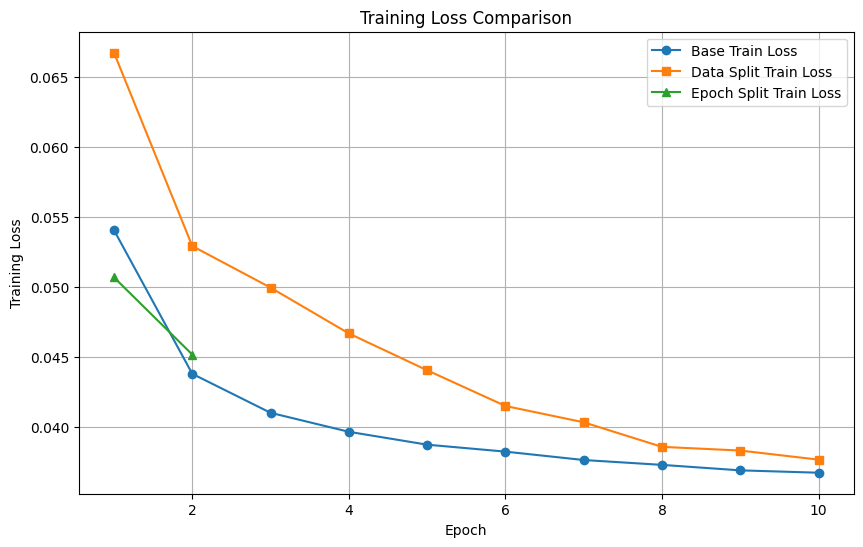

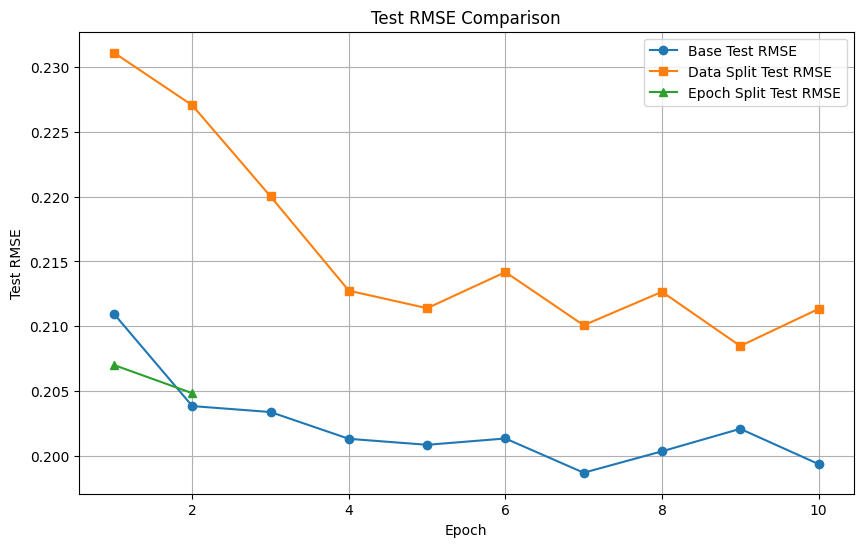

In [3]:
import matplotlib.pyplot as plt

# Base (full-length curves)
base_train = base["train_losses"]
base_test = base["test_rmses"]

# Data split (min curves, full-length)
split_train = split["min_train_curve"]
split_test = split["min_test_rmse_curve"]

# Epoch split (only 2 epochs)
epoch_train = epoch["min_train_curve"]
epoch_test = epoch["min_test_rmse_curve"]

# Epoch indices
n_epochs_base = len(base_train)
n_epochs_epoch_split = len(epoch_train)  # 2

# ---------- Plot Train Loss ----------
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs_base+1), base_train, marker='o', label="Base Train Loss")
plt.plot(range(1, n_epochs_base+1), split_train, marker='s', label="Data Split Train Loss")
plt.plot(range(1, n_epochs_epoch_split+1), epoch_train, marker='^', label="Epoch Split Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss Comparison")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot Test RMSE ----------
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs_base+1), base_test, marker='o', label="Base Test RMSE")
plt.plot(range(1, n_epochs_base+1), split_test, marker='s', label="Data Split Test RMSE")
plt.plot(range(1, n_epochs_epoch_split+1), epoch_test, marker='^', label="Epoch Split Test RMSE")
plt.xlabel("Epoch")
plt.ylabel("Test RMSE")
plt.title("Test RMSE Comparison")
plt.legend()
plt.grid(True)
plt.show()


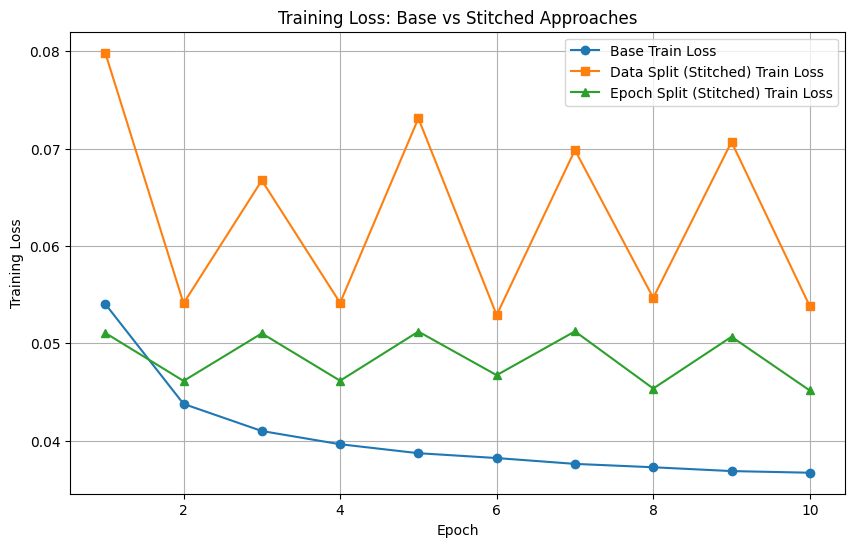

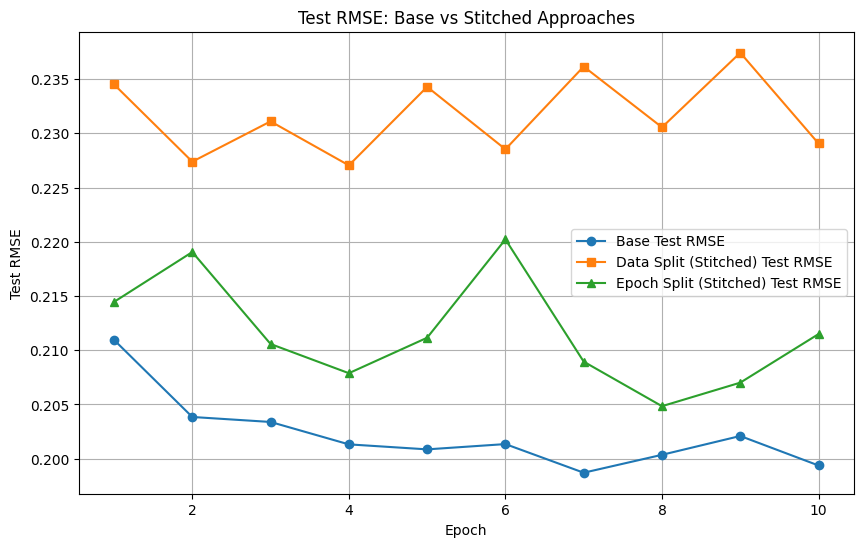

In [4]:
# Data split (stitched)
split_train_stitched = split["stitched_train_curve"]
split_test_stitched = split["stitched_test_rmse_curve"]

# Epoch split (stitched)
epoch_train_stitched = epoch["stitched_train_curve"]
epoch_test_stitched = epoch["stitched_test_rmse_curve"]

# Choose epochs length based on base (assumption: same total length)
n_epochs = len(base_train)

# ---------- Plot Train Loss (stitched vs base) ----------
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs+1), base_train, marker='o', label="Base Train Loss")
plt.plot(range(1, len(split_train_stitched)+1), split_train_stitched, marker='s', label="Data Split (Stitched) Train Loss")
plt.plot(range(1, len(epoch_train_stitched)+1), epoch_train_stitched, marker='^', label="Epoch Split (Stitched) Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss: Base vs Stitched Approaches")
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot Test RMSE (stitched vs base) ----------
plt.figure(figsize=(10,6))
plt.plot(range(1, n_epochs+1), base_test, marker='o', label="Base Test RMSE")
plt.plot(range(1, len(split_test_stitched)+1), split_test_stitched, marker='s', label="Data Split (Stitched) Test RMSE")
plt.plot(range(1, len(epoch_test_stitched)+1), epoch_test_stitched, marker='^', label="Epoch Split (Stitched) Test RMSE")
plt.xlabel("Epoch")
plt.ylabel("Test RMSE")
plt.title("Test RMSE: Base vs Stitched Approaches")
plt.legend()
plt.grid(True)
plt.show()